In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import re
import nltk
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [3]:
train_tweets = pd.read_csv("C:/Users/Acer/Documents/JOB_PREPARATION/Twitter-Sentiment-Analysis-Supervised-Learning-master/Twitter-Sentiment-Analysis-Supervised-Learning-master/Data/train_tweets.csv")
test_tweets = pd.read_csv("C:/Users/Acer/Documents/JOB_PREPARATION/Twitter-Sentiment-Analysis-Supervised-Learning-master/Twitter-Sentiment-Analysis-Supervised-Learning-master/Data/test_tweets.csv")

In [4]:
train_tweets.head()
test_tweets.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [5]:
train = train_tweets[['label','tweet']]
test = test_tweets['tweet']


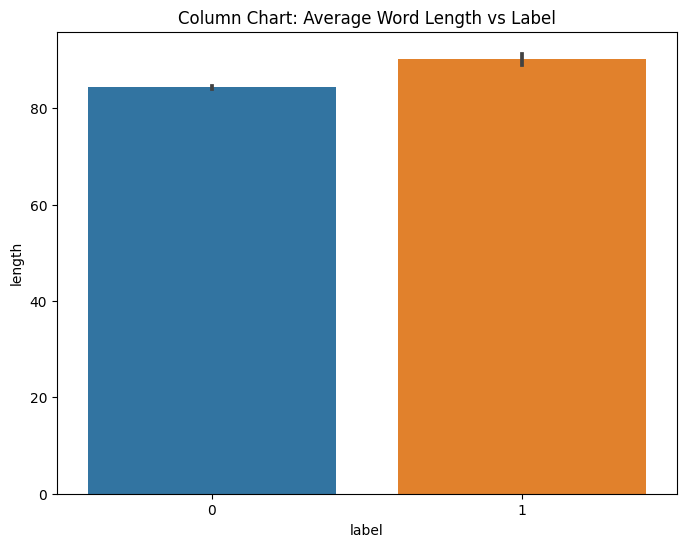

In [24]:


train['length'] = train['tweet'].apply(len)
plt.figure(figsize=(8, 6))
sns.barplot(x='label', y='length', data=train)
plt.title('Column Chart: Average Word Length vs Label')
plt.savefig('ColumnChart.png')


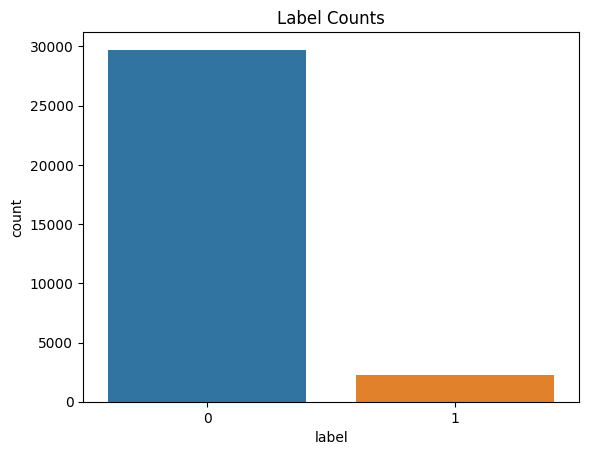

In [7]:
fig2 = sns.countplot(x= 'label',data = train)
plt.title('Label Counts')
plot = fig2.get_figure()
plot.savefig('Count Plot.png')

In [21]:
def text_formatting(tweet):
    
    
    def remove_punc(tweet):
        tweet_blob = TextBlob(tweet)
        return ' '.join(tweet_blob.words)
    
    new_tweet = remove_punc(tweet)
    
    
    def remove_stop_words(tweet):
        tweet_list = [word for word in tweet.split() if word.lower() != 'user']
        clean_tokens = [t for t in tweet_list if re.match(r'[^\W\d]*$', t)]
        clean_mess = [word for word in clean_tokens if word.lower() not in stopwords.words('english')]
        return clean_mess
    
    cleaned_tweet = remove_stop_words(new_tweet)
    
    
    def lemmatize_tweet(tweet_list):
        lem = WordNetLemmatizer()
        normalized_tweet = [lem.lemmatize(word, 'v') for word in tweet_list]
        return normalized_tweet
    
    return lemmatize_tweet(cleaned_tweet)


train_tweets['tweet_list'] = train['tweet'].apply(text_formatting)
test_tweets['tweet_list'] = test_tweets['tweet'].apply(text_formatting)


In [17]:
train_tweets[train_tweets['label']==1].drop('tweet',axis=1).head()

,id,label,tweet_list
13,14,1,"[cnn, call, michigan, middle, school, wall, ch..."
14,15,1,"[comment, australia, opkillingbay, seashepherd..."
17,18,1,"[retweet, agree]"
23,24,1,"[lumpy, say, prove, lumpy]"
34,35,1,"[unbelievable, century, need, something, like,..."


In [18]:
X = train_tweets['tweet']
y = train_tweets['label']
test = test_tweets['tweet']

In [19]:
from sklearn.model_selection import train_test_split
msg_train, msg_test, label_train, label_test = train_test_split(train_tweets['tweet'], train_tweets['label'], test_size=0.2)

In [13]:
#Machine Learning Pipeline
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_formatting)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_processing at 0x000001F83D736B00>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [20]:
predictions = pipeline.predict(msg_test)

print(classification_report(predictions,label_test))
print ('\n')
print(confusion_matrix(predictions,label_test))
print(accuracy_score(predictions,label_test))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      6314
           1       0.17      1.00      0.29        79

    accuracy                           0.94      6393
   macro avg       0.58      0.97      0.63      6393
weighted avg       0.99      0.94      0.96      6393



[[5926  388]
 [   0   79]]
0.9393086188018145
